In [9]:
import numpy as np
import nn
import idx2numpy
import matplotlib.pyplot as plt

In [4]:
train_img = (idx2numpy.convert_from_file("train-images.idx3-ubyte")/255).reshape(-1, 28 * 28)
train_lbl = idx2numpy.convert_from_file("train-labels.idx1-ubyte")
test_img = (idx2numpy.convert_from_file("t10k-images.idx3-ubyte")/255).reshape(-1, 28 * 28)
test_lbl = idx2numpy.convert_from_file("t10k-labels.idx1-ubyte")


In [5]:

m = nn.Model()


m.add(nn.Layer_Dense(28*28, 500, weight_regularizer_l2 = 0.02, bias_regularizer_l2 = 0.02))
m.add(nn.Activation_ReLU())
m.add(nn.Layer_Dense(500, 500))
m.add(nn.Activation_ReLU())
m.add(nn.Layer_Dense(500, 10))
m.add(nn.Activation_Softmax())


m.set(Loss = nn.Loss_CategoricalCrossentropy(),      
 Optimizer = nn.Optimizer_Adam())


for i in range(1, 5):
    print(f'EPOCH = {i} --------------------------------------')
    m.train(train_img, train_lbl , batch= 6, shuffle = True, print_every = 2)
    m.test(test_img, test_lbl, batch = 6, shuffle = True)



EPOCH = 1 --------------------------------------
Loss : 4.1128     [10000/ 60000]
Loss : 2.3177     [30000/ 60000]
Loss : 1.5862     [50000/ 60000]
Test LOSS : 1.1129    Accuracy = 69.4 
EPOCH = 2 --------------------------------------
Loss : 0.9265     [10000/ 60000]
Loss : 0.7595     [30000/ 60000]
Loss : 0.6683     [50000/ 60000]
Test LOSS : 0.6280    Accuracy = 83.3 
EPOCH = 3 --------------------------------------
Loss : 0.5294     [10000/ 60000]
Loss : 0.4681     [30000/ 60000]
Loss : 0.4705     [50000/ 60000]
Test LOSS : 0.4845    Accuracy = 88.0 
EPOCH = 4 --------------------------------------
Loss : 0.4114     [10000/ 60000]
Loss : 0.3871     [30000/ 60000]
Loss : 0.3792     [50000/ 60000]
Test LOSS : 0.3949    Accuracy = 90.0 


In [6]:
m.save("model",m)
"model Saved Sucessfully"

'model Saved Sucessfully'

In [7]:
m.load("model")
"model Loded Sucessfully"

'model Loded Sucessfully'

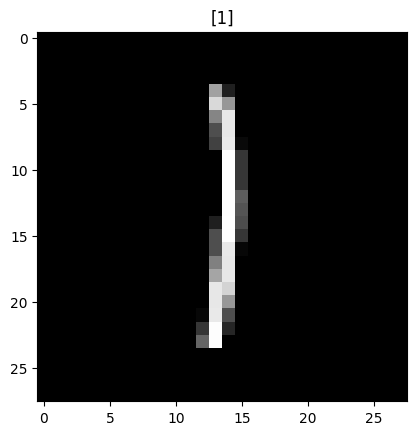

In [76]:
r = np.random.randint(10000)
plt.title(m.predict(test_img[r]))
plt.imshow(test_img[r].reshape(28,28), cmap= "gray")